# Cardiovascular Disease Prediction

The prediction of cardiovascular disease (CVD) is a vital undertaking in healthcare analytics, with the goal of identifying individuals who are at risk of developing heart-related ailments. This dataset offers significant insights into forecasting the occurrence or non-occurrence of cardiovascular disease, utilizing diverse health-related attributes.

# Dataset Description

The dataset contains information related to cardiovascular disease, with various features for each individual. The dataset is structured with the following columns:


- **id:** Unique identifier for each individual.
- **age:** Age of the individual in days.
- **gender:** Gender of the individual (1: female, 2: male).
- **height:** Height of the individual in centimeters.
- **weight:** Weight of the individual in kilograms.
- **ap_hi:** Systolic blood pressure.
- **ap_lo:** Diastolic blood pressure.
- **cholesterol:** Cholesterol level (1: normal, 2: above normal, 3: well above normal).
- **gluc:** Glucose level (1: normal, 2: above normal, 3: well above normal).
- **smoke:** Smoking status (0: non-smoker, 1: smoker).
- **alco:** Alcohol consumption status (0: non-drinker, 1: drinker).
- **active:** Physical activity level (0: inactive, 1: active).
- **cardio:** Presence or absence of cardiovascular disease (0: no disease, 1: disease).


| id | age | gender | height | weight | ap_hi | ap_lo | cholesterol | gluc | smoke | alco | active | cardio |
|----|-----|--------|--------|--------|-------|-------|-------------|------|-------|------|--------|--------|
| 0  | 18393 | 2 | 168 | 62.0 | 110 | 80 | 1 | 1 | 0 | 0 | 1 | 0 |
| 1  | 20228 | 1 | 156 | 85.0 | 140 | 90 | 3 | 1 | 0 | 0 | 1 | 1 |
| 2  | 18857 | 1 | 165 | 64.0 | 130 | 70 | 3 | 1 | 0 | 0 | 0 | 1 |
| 3  | 17623 | 2 | 169 | 82.0 | 150 | 100 | 1 | 1 | 0 | 0 | 1 | 1 |
| 4  | 17474 | 1 | 156 | 56.0 | 100 | 60 | 1 | 1 | 0 | 0 | 0 | 0 |
| 8  | 21914 | 1 | 151 | 67.0 | 120 | 80 | 2 | 2 | 0 | 0 | 0 | 0 |

This dataset provides valuable information for exploring the relationships between various health-related factors and the presence of cardiovascular disease in individuals.


### Importing necessary libraries

In [76]:
import pandas as pd;
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics, preprocessing
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV,StratifiedKFold,cross_val_predict
from kmodes.kmodes import KModes
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report,roc_curve, auc,accuracy_score,average_precision_score,precision_score,recall_score,f1_score

### Reading the dataset "cardio_train.csv" into a DataFrame named cardio

In [2]:
cardio=pd.read_csv("cardio_train.csv")

### Displaying the DataFrame cardio

In [3]:
cardio

,id;age;gender;height;weight;ap_hi;ap_lo;cholesterol;gluc;smoke;alco;active;cardio
0,0;18393;2;168;62.0;110;80;1;1;0;0;1;0
1,1;20228;1;156;85.0;140;90;3;1;0;0;1;1
2,2;18857;1;165;64.0;130;70;3;1;0;0;0;1
3,3;17623;2;169;82.0;150;100;1;1;0;0;1;1
4,4;17474;1;156;56.0;100;60;1;1;0;0;0;0
...,...
69995,99993;19240;2;168;76.0;120;80;1;1;1;0;1;0
69996,99995;22601;1;158;126.0;140;90;2;2;0;0;1;1
69997,99996;19066;2;183;105.0;180;90;3;1;0;1;0;1
69998,99998;22431;1;163;72.0;135;80;1;2;0;0;0;1


# Data Pre-Processing

### Reading the dataset "cardio_train.csv" again with a delimiter ';', and storing it in DataFrame df

In [4]:
df = pd.read_csv("cardio_train.csv",delimiter = ';')
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


### Displaying the shape of the DataFrame df

In [5]:
df.shape

(70000, 13)

### Checking for missing values in the DataFrame df and summing them up

In [6]:
df.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

### Checking for duplicated rows in the DataFrame df

In [7]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
69995    False
69996    False
69997    False
69998    False
69999    False
Length: 70000, dtype: bool

### Summing up the duplicated rows in the DataFrame df

In [8]:
df.duplicated().sum()

0

### Displaying information about the DataFrame df

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


### Dropping the 'id' column from the DataFrame df along the columns axis

In [10]:
df=df.drop('id',axis=1)


###  Displaying the modified DataFrame df

In [11]:
df

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
69995,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,22431,1,163,72.0,135,80,1,2,0,0,0,1


### Displaying descriptive statistics of the DataFrame df before removing outliers

In [12]:
df.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


## Visualization of Numerical Features before removing Outliers

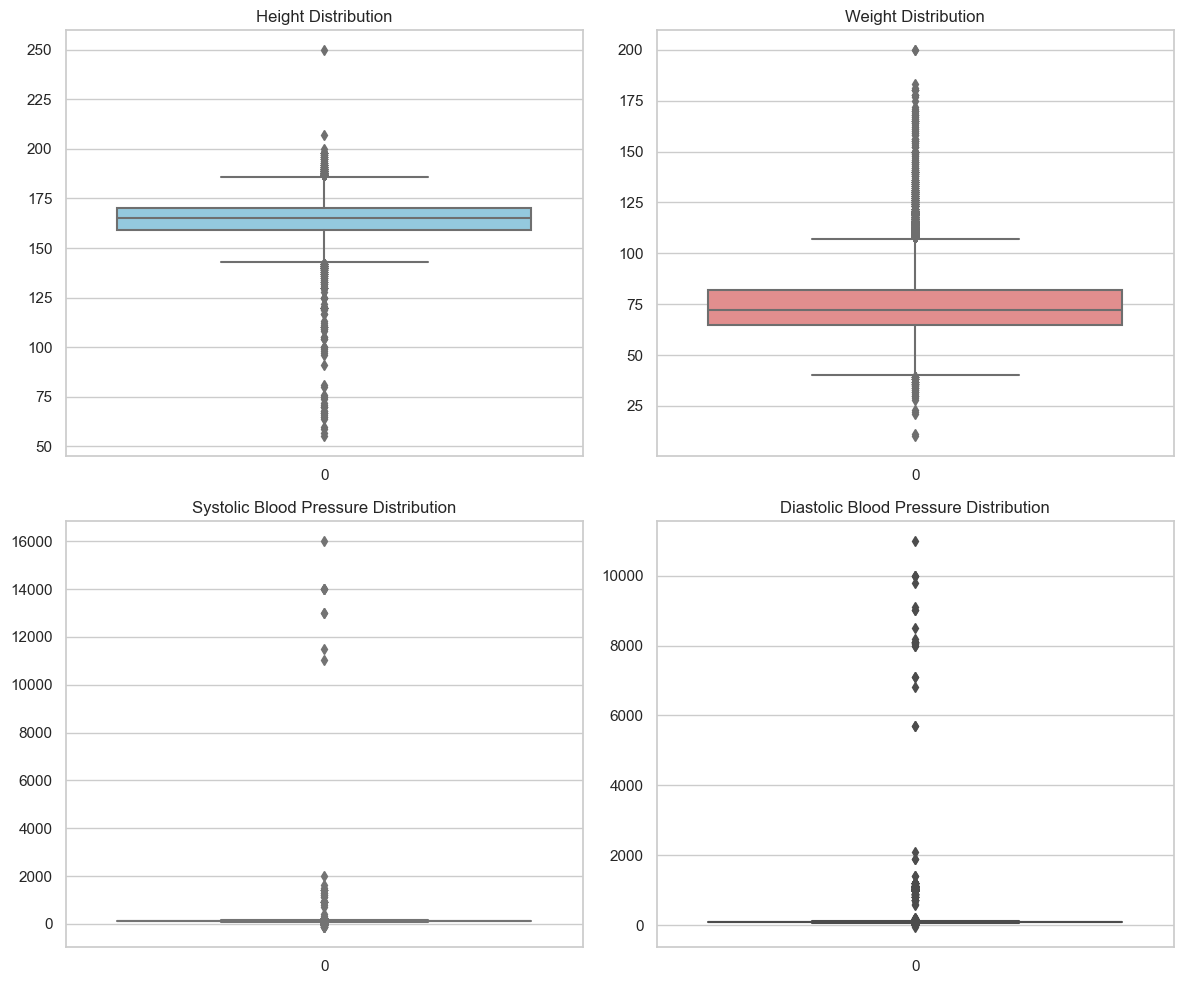

In [13]:

# Set the style for seaborn
sns.set(style="whitegrid")

# Create a figure with subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

# Plotting boxplots for each numerical column
sns.boxplot(ax=axes[0, 0], data=df['height'], color='skyblue')
axes[0, 0].set_title('Height Distribution')

sns.boxplot(ax=axes[0, 1], data=df['weight'], color='lightcoral')
axes[0, 1].set_title('Weight Distribution')

sns.boxplot(ax=axes[1, 0], data=df['ap_hi'], color='lightgreen')
axes[1, 0].set_title('Systolic Blood Pressure Distribution')

sns.boxplot(ax=axes[1, 1], data=df['ap_lo'], color='gold')
axes[1, 1].set_title('Diastolic Blood Pressure Distribution')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


### Removing outliers in the 'height', 'weight', 'ap_hi', and 'ap_lo' columns based on quantiles

In [14]:
df.drop(df[(df['height'] > df['height'].quantile(0.975)) | (df['height'] < df['height'].quantile(0.025))].index,inplace=True)
df.drop(df[(df['weight'] > df['weight'].quantile(0.975)) | (df['weight'] < df['weight'].quantile(0.025))].index,inplace=True)
df.drop(df[(df['ap_hi'] > df['ap_hi'].quantile(0.975)) | (df['ap_hi'] < df['ap_hi'].quantile(0.025))].index,inplace=True)
df.drop(df[(df['ap_lo'] > df['ap_lo'].quantile(0.975)) | (df['ap_lo'] < df['ap_lo'].quantile(0.025))].index,inplace=True)

In [15]:
df

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
69993,19699,1,172,70.0,130,90,1,1,0,0,1,1
69994,21074,1,165,80.0,150,80,1,1,0,0,1,1
69995,19240,2,168,76.0,120,80,1,1,1,0,1,0
69998,22431,1,163,72.0,135,80,1,2,0,0,0,1


### Removing Outliers

Outliers were removed from the dataset to enhance the performance of prediction models. The removal process targeted values outside the range of 2.5% to 97.5% for the features: `ap_hi`, `ap_lo`, `weight`, and `height`.

### Before Outlier Removal:

- Original dataset size: 70,000 records

### After Outlier Removal:

- Modified dataset size: 60,142 records

This step aims to ensure that extreme values, which can potentially impact the accuracy of predictive models, are excluded from the analysis.


In [16]:
len(df)

60142

###  Cases of Diastolic Pressure Higher than Systolic

We investigated instances where the diastolic blood pressure (`ap_lo`) is higher than the systolic blood pressure (`ap_hi`). This condition is considered abnormal in blood pressure measurements.

The number of cases where diastolic pressure is higher than systolic pressure is obtained through the following analysis:




In [17]:
df[df['ap_lo']> df['ap_hi']].shape[0]

0

### Displaying descriptive statistics of the DataFrame df after removing outliers

In [18]:
df.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,60142.000000,60142.000000,60142.000000,60142.000000,60142.000000,60142.000000,60142.000000,60142.000000,60142.000000,60142.000000,60142.000000,60142.000000
mean,19468.719979,1.347311,164.554854,73.426805,125.770526,81.046307,1.350953,1.220229,0.085631,0.051877,0.803648,0.488228
std,2460.510296,0.476120,6.830174,11.614806,13.761847,8.239157,0.670076,0.567607,0.279820,0.221781,0.397241,0.499866
min,10798.000000,1.000000,150.000000,52.000000,100.000000,60.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,17677.250000,1.000000,160.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,19705.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,21321.000000,2.000000,169.000000,80.000000,135.000000,90.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,23713.000000,2.000000,180.000000,106.000000,163.000000,100.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


## Visualization of Numerical Features After removing Outliers

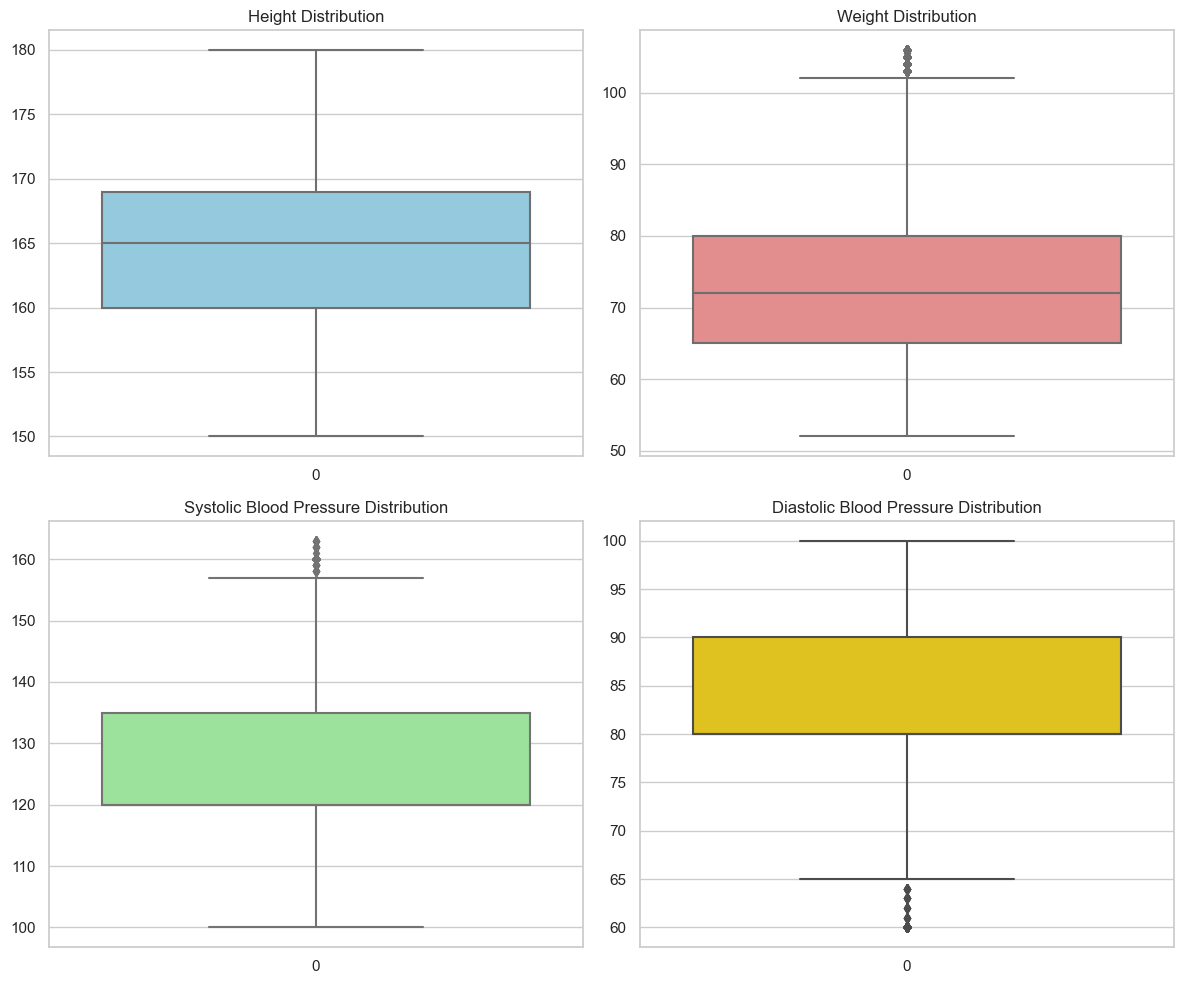

In [19]:
# Set the style for seaborn
sns.set(style="whitegrid")

# Create a figure with subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

# Plotting boxplots for each numerical column
sns.boxplot(ax=axes[0, 0], data=df['height'], color='skyblue')
axes[0, 0].set_title('Height Distribution')

sns.boxplot(ax=axes[0, 1], data=df['weight'], color='lightcoral')
axes[0, 1].set_title('Weight Distribution')

sns.boxplot(ax=axes[1, 0], data=df['ap_hi'], color='lightgreen')
axes[1, 0].set_title('Systolic Blood Pressure Distribution')

sns.boxplot(ax=axes[1, 1], data=df['ap_lo'], color='gold')
axes[1, 1].set_title('Diastolic Blood Pressure Distribution')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


### Age Transformation

To facilitate analysis and interpretation, the 'age' feature in the dataset was transformed from being represented in days to years. This conversion was achieved by dividing the age in days by 365, rounding the result, and then converting it to an integer.

The transformation was implemented with the following code snippet:




In [20]:
df['age'] = (df['age'] / 365).round().astype('int')

print(df.head())

   age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  alco  \
0   50       2     168    62.0    110     80            1     1      0     0   
1   55       1     156    85.0    140     90            3     1      0     0   
2   52       1     165    64.0    130     70            3     1      0     0   
3   48       2     169    82.0    150    100            1     1      0     0   
4   48       1     156    56.0    100     60            1     1      0     0   

   active  cardio  
0       1       0  
1       1       1  
2       0       1  
3       1       1  
4       0       0  


In [21]:
# Define the bin edges and labels
age_edges = [30, 35, 40, 45, 50, 55, 60, 65]
age_labels = [0, 1, 2, 3, 4, 5, 6]

#  bin in  5 years span
df['age_group'] = pd.cut(df['age'], bins=7, labels=range(7), include_lowest=True,right=True)


In [22]:
df

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_group
0,50,2,168,62.0,110,80,1,1,0,0,1,0,3
1,55,1,156,85.0,140,90,3,1,0,0,1,1,4
2,52,1,165,64.0,130,70,3,1,0,0,0,1,4
3,48,2,169,82.0,150,100,1,1,0,0,1,1,3
4,48,1,156,56.0,100,60,1,1,0,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69993,54,1,172,70.0,130,90,1,1,0,0,1,1,4
69994,58,1,165,80.0,150,80,1,1,0,0,1,1,5
69995,53,2,168,76.0,120,80,1,1,1,0,1,0,4
69998,61,1,163,72.0,135,80,1,2,0,0,0,1,6


## Combination of Attributes: Body Mass Index (BMI) and Mean Arterial Pressure (MAP)

To enhance the dataset's representational power, we have amalgamated certain individual characteristics into more meaningful composite attributes. Specifically, we have incorporated Body Mass Index (BMI) and Mean Arterial Pressure (MAP) into the dataset.

### Body Mass Index (BMI)

BMI is calculated using the formula: 

BMI = (weight in kilograms) / (height in meters)^2

This composite attribute provides a more holistic representation of the relationship between an individual's weight and height, capturing insights into overall body composition.

### Mean Arterial Pressure (MAP)

Mean Arterial Pressure (MAP) is a derived metric that combines systolic and diastolic blood pressure, providing a more comprehensive measure of blood pressure:

MAP = (2 * diastolic pressure + systolic pressure) / 3

Incorporating BMI and MAP into the dataset allows for a more nuanced analysis, considering the interplay between weight, height, and blood pressure in a consolidated manner.


In [23]:
df['bmi'] = df['weight']/((df['height']/100)**2) # Calculate BMI (Body Mass Index) by dividing weight in kilograms by the square of height in meters (converted from centimeters to meters)
df.head() # Display the first five rows of the DataFrame with the newly added 'bmi' column

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_group,bmi
0,50,2,168,62.0,110,80,1,1,0,0,1,0,3,21.967120
1,55,1,156,85.0,140,90,3,1,0,0,1,1,4,34.927679
2,52,1,165,64.0,130,70,3,1,0,0,0,1,4,23.507805
3,48,2,169,82.0,150,100,1,1,0,0,1,1,3,28.710479
4,48,1,156,56.0,100,60,1,1,0,0,0,0,3,23.011177


In [24]:
# Calculate the minimum and maximum BMI values in the DataFrame
bmiMin = int(df['bmi'].min()) 
bmiMax = int(df['bmi'].max()) 

print(bmiMin, bmiMax)# Display the minimum and maximum BMI values


16 46


In [25]:
df['bmi'] = pd.cut(df['bmi'], bins=6, labels=range(6), right=True, include_lowest=True) # Convert the continuous BMI values into categorical bins with six intervals

df.head() # Display the first five rows of the DataFrame with the 'bmi' column converted to categorical bins

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_group,bmi
0,50,2,168,62.0,110,80,1,1,0,0,1,0,3,1
1,55,1,156,85.0,140,90,3,1,0,0,1,1,4,3
2,52,1,165,64.0,130,70,3,1,0,0,0,1,4,1
3,48,2,169,82.0,150,100,1,1,0,0,1,1,3,2
4,48,1,156,56.0,100,60,1,1,0,0,0,0,3,1


### Calculate and display the normalized value counts for each BMI category

In [26]:
df["bmi"].value_counts(normalize=True) 

1    0.461325
2    0.330202
3    0.133068
0    0.038193
4    0.033554
5    0.003658
Name: bmi, dtype: float64

In [27]:
df

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_group,bmi
0,50,2,168,62.0,110,80,1,1,0,0,1,0,3,1
1,55,1,156,85.0,140,90,3,1,0,0,1,1,4,3
2,52,1,165,64.0,130,70,3,1,0,0,0,1,4,1
3,48,2,169,82.0,150,100,1,1,0,0,1,1,3,2
4,48,1,156,56.0,100,60,1,1,0,0,0,0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69993,54,1,172,70.0,130,90,1,1,0,0,1,1,4,1
69994,58,1,165,80.0,150,80,1,1,0,0,1,1,5,2
69995,53,2,168,76.0,120,80,1,1,1,0,1,0,4,2
69998,61,1,163,72.0,135,80,1,2,0,0,0,1,6,2


## Elucidation:

1. **Compute BMI:** Calculate the Body Mass Index (BMI) for each record in the dataset using the weight and height columns.


2. **Display Initial Rows:** Present the initial five rows of the DataFrame, showcasing the inclusion of the newly computed 'bmi' column.


3. **BMI Range:** Compute and display the minimum and maximum BMI values in the dataset, providing insights into the BMI range.


4. **Categorical Transformation:** Transform the continuous BMI values into categorical bins using the `pd.cut` function, dividing them into six intervals.


5. **Display Transformed Rows:** Present the initial five rows of the DataFrame after converting the 'bmi' column into categorical bins, aiding in visualizing the categorization.


6. **BMI Distribution:** Calculate and present the normalized frequency of each BMI category. This reveals the distribution of individuals across various BMI ranges, offering a comprehensive overview of the dataset's body mass composition.


In [28]:
# Calculate Mean Arterial Pressure (MAP) using the formula: ((2 * diastolic pressure) + systolic pressure) / 3
df['map'] = ((2 * df['ap_lo']) + df['ap_hi']) / 3

In [29]:
# Calculate and print the minimum and maximum values of the newly created 'map' column
mapMin = int(df['map'].min())
mapMax = int(df['map'].max())
print(mapMin, mapMax)

73 121


In [30]:
# Convert the continuous MAP values into categorical bins with six intervals using pd.cut
df['map'] = pd.cut(df['map'], bins=6, labels=range(6), right=True, include_lowest=True)

In [31]:
# Display the first five rows of the DataFrame with the 'map' column converted to categorical bins
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_group,bmi,map
0,50,2,168,62.0,110,80,1,1,0,0,1,0,3,1,2
1,55,1,156,85.0,140,90,3,1,0,0,1,1,4,3,4
2,52,1,165,64.0,130,70,3,1,0,0,0,1,4,1,2
3,48,2,169,82.0,150,100,1,1,0,0,1,1,3,2,5
4,48,1,156,56.0,100,60,1,1,0,0,0,0,3,1,0


## Elucidation:

1. **Compute Mean Arterial Pressure (MAP):** The DataFrame is modified by adding a new column called 'map' that calculates the Mean Arterial Pressure (MAP) using a formula that incorporates both systolic and diastolic blood pressure.


2. **Compute and Display Range:** The minimum and maximum values of the recently generated 'map' column are computed and displayed. This analysis offers valuable information regarding the spectrum of Mean Arterial Pressure (MAP) values present in the dataset.


3. **Categorize into Bins:** The continuous MAP values are converted into categorical bins by utilizing the `pd.cut` function, which divides them into six intervals. By categorizing the MAP data, the analysis and visualization process becomes more streamlined and easier to understand.



4. **Present Transformed Rows:** The initial five rows of the DataFrame are exhibited subsequent to converting the 'map' column into categorical bins, facilitating a rapid overview of the categorization.



These operations cumulatively incorporate the Mean Arterial Pressure (MAP) into the dataset, thereby enhancing the dataset with a more extensive range of features for subsequent analysis.


In [32]:
# Select rows with at least one null value in any column
null_rows = df[df.isnull().any(axis=1)]
# Print a message indicating rows with null values
print("Rows with null values:")
# Display the DataFrame containing rows with null values
print(null_rows)

Rows with null values:
Empty DataFrame
Columns: [age, gender, height, weight, ap_hi, ap_lo, cholesterol, gluc, smoke, alco, active, cardio, age_group, bmi, map]
Index: []


In [33]:
# Instantiate a LabelEncoder object
le = preprocessing.LabelEncoder()
# Apply the LabelEncoder to the entire DataFrame, transforming categorical variables into numerical label
df = df.apply(le.fit_transform)

In [34]:
df.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_group,bmi,map
count,60142.000000,60142.000000,60142.000000,60142.000000,60142.000000,60142.000000,60142.000000,60142.000000,60142.000000,60142.000000,60142.000000,60142.000000,60142.000000,60142.000000,60142.000000
mean,15.339330,0.347311,14.554854,78.529048,25.770526,21.046307,0.350953,0.220229,0.085631,0.051877,0.803648,0.488228,4.042233,1.673440,2.359449
std,6.745339,0.476120,6.830174,40.278197,13.761847,8.239157,0.670076,0.567607,0.279820,0.221781,0.397241,0.499866,1.377070,0.898707,1.186906
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10.000000,0.000000,10.000000,48.000000,20.000000,20.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,3.000000,1.000000,2.000000
50%,16.000000,0.000000,15.000000,79.000000,20.000000,20.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,4.000000,2.000000,2.000000
75%,20.000000,1.000000,19.000000,106.000000,35.000000,30.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,5.000000,2.000000,3.000000
max,27.000000,1.000000,30.000000,159.000000,63.000000,40.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,6.000000,5.000000,5.000000


In [35]:
df

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_group,bmi,map
0,12,1,18,32,10,20,0,0,0,0,1,0,3,1,2
1,17,0,6,125,40,30,2,0,0,0,1,1,4,3,4
2,14,0,15,42,30,10,2,0,0,0,0,1,4,1,2
3,10,1,19,112,50,40,0,0,0,0,1,1,3,2,5
4,10,0,6,15,0,0,0,0,0,0,0,0,3,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69993,16,0,22,69,30,30,0,0,0,0,1,1,4,1,3
69994,20,0,15,106,50,20,0,0,0,0,1,1,5,2,3
69995,15,1,18,95,20,20,0,0,1,0,1,0,4,2,2
69998,23,0,13,79,35,20,0,1,0,0,0,1,6,2,3


## Exploratory Data Analysis

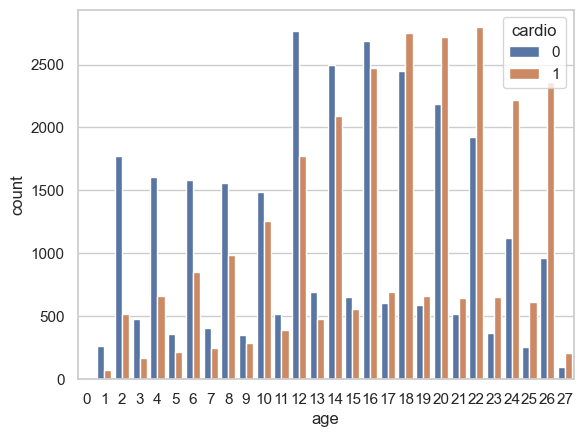

In [36]:
#plot cardio count with age
sns.countplot(data=df,x="age",hue="cardio")
plt.show()

In [37]:
#check wheater data set is balance or imbalance
df["cardio"].value_counts()

0    30779
1    29363
Name: cardio, dtype: int64

<AxesSubplot:>

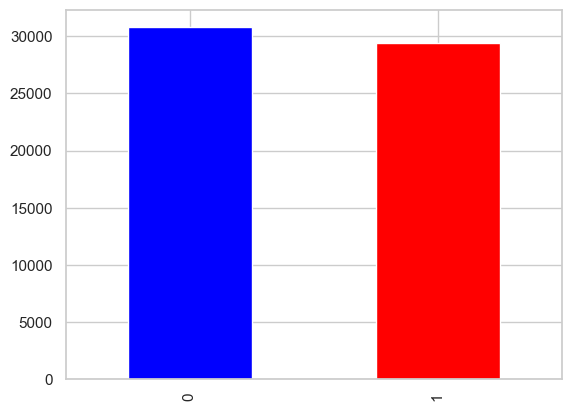

In [38]:
df["cardio"].value_counts().plot(kind='bar',color=['blue','Red'])

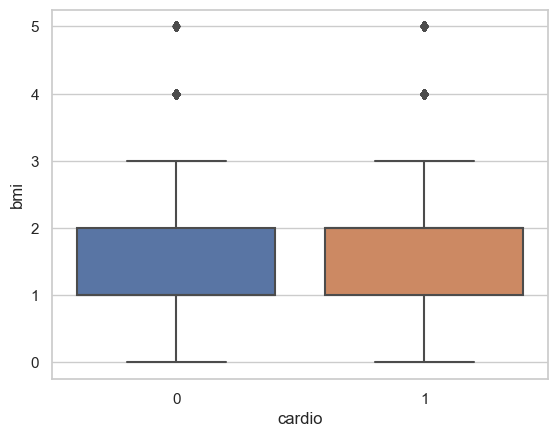

In [39]:
#get plot about bmi and cardio in cardio table
sns.boxplot(data=df,x="cardio",y="bmi")
plt.show()

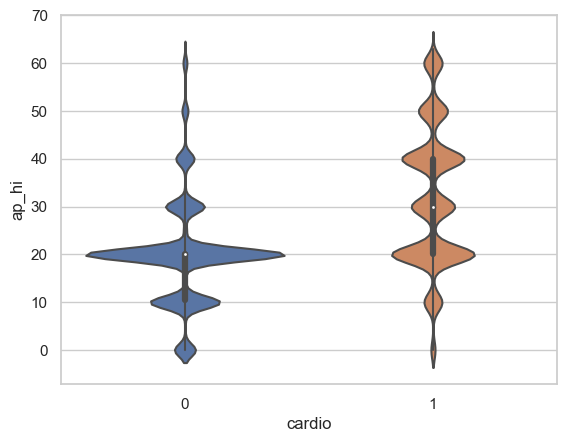

In [40]:
# plot ap_hi with cardio
sns.violinplot(data=df, x="cardio", y="ap_hi")
plt.show()

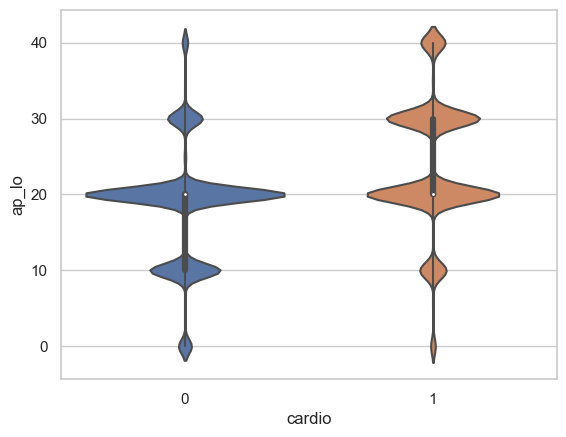

In [41]:
#plot cardio count with ap_lo
sns.violinplot(data=df, x="cardio", y="ap_lo")
plt.show()

## Correlation Matrix

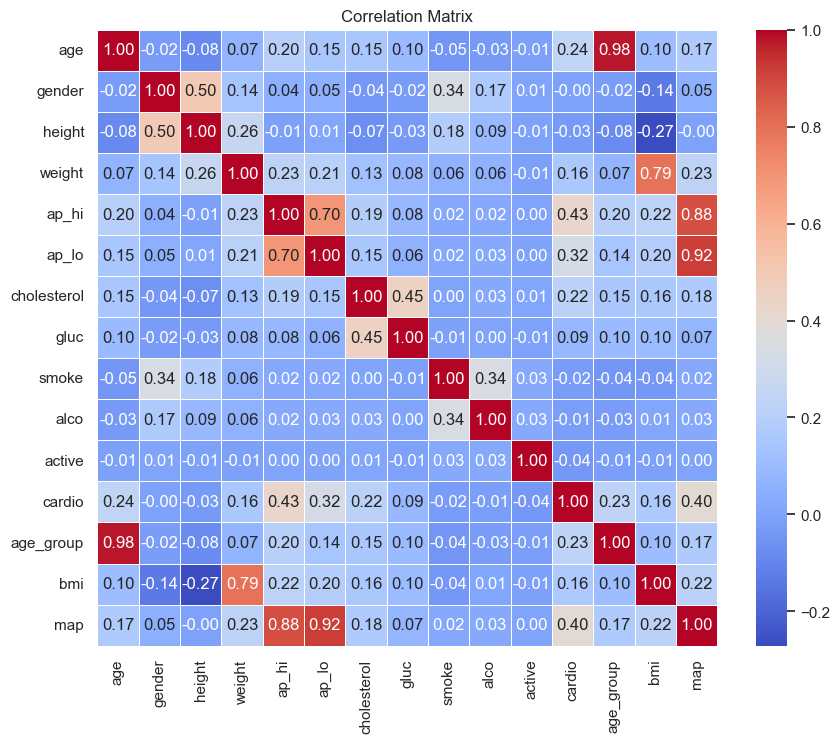

In [42]:
# Set up figure
plt.figure(figsize=(10, 8))

# Draw correlation matrix with a different colormap
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

# Show the figure
plt.title('Correlation Matrix')
plt.show()


# Clustering Analysis with K-Modes Algorithm

Clustering is a technique used in machine learning to identify similarities among data points by forming groups. The K-means algorithm is a common method for clustering; however, it may lack efficacy when applied to datasets containing categorical data. K-means utilizes the Euclidean distance metric, which may not be suitable for categorical variables. To address this, we opted for the K-modes clustering algorithm, specifically designed for handling categorical data.

## K-Modes Clustering:

The K-modes algorithm calculates distances between categories based on their modes, making it particularly well-suited for datasets with categorical features. Unlike K-means, which uses the Euclidean distance, K-modes is more robust in handling non-numerical data.

## Determining the Number of Clusters:

To identify the most suitable number of clusters for our dataset, we employed the elbow curve technique. This method involves running the K-modes algorithm with different numbers of clusters and observing how the within-cluster sum of squared distances changes. The "elbow" point, where the rate of decrease slows down, is considered an optimal choice for the number of clusters.

This approach allows us to group similar data points based on categorical features, providing valuable insights into patterns and relationships within the dataset.


In [43]:
cost = []
num_clusters = range(1,6) # 1 to 5
for i in list(num_clusters):
    kmode = KModes(n_clusters=i, init = "Huang", n_init = 5, verbose=0,random_state=1)
    kmode.fit_predict(df)
    cost.append(kmode.cost_)

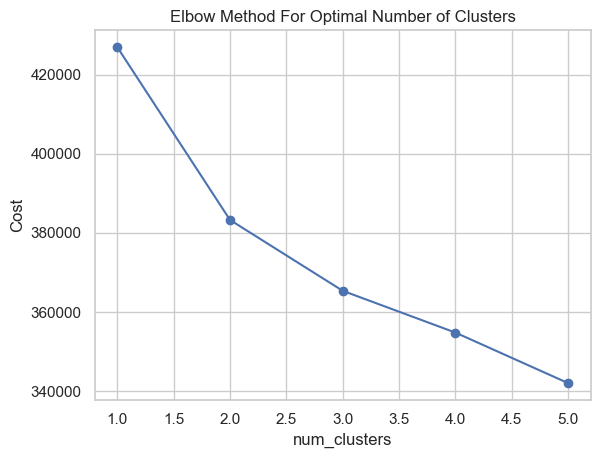

In [44]:
plt.plot(num_clusters, cost, 'bo-')
plt.xlabel('num_clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal Number of Clusters')
plt.show()

In [45]:
km = KModes(n_clusters=2, init = "Huang", n_init = 5,random_state=1)
clusters = km.fit_predict(df)
clusters

array([0, 1, 0, ..., 0, 1, 0], dtype=uint16)

In [46]:
df.insert(0,"clusters",clusters,True)
df.head()

,clusters,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_group,bmi,map
0,0,12,1,18,32,10,20,0,0,0,0,1,0,3,1,2
1,1,17,0,6,125,40,30,2,0,0,0,1,1,4,3,4
2,0,14,0,15,42,30,10,2,0,0,0,0,1,4,1,2
3,1,10,1,19,112,50,40,0,0,0,0,1,1,3,2,5
4,0,10,0,6,15,0,0,0,0,0,0,0,0,3,1,0


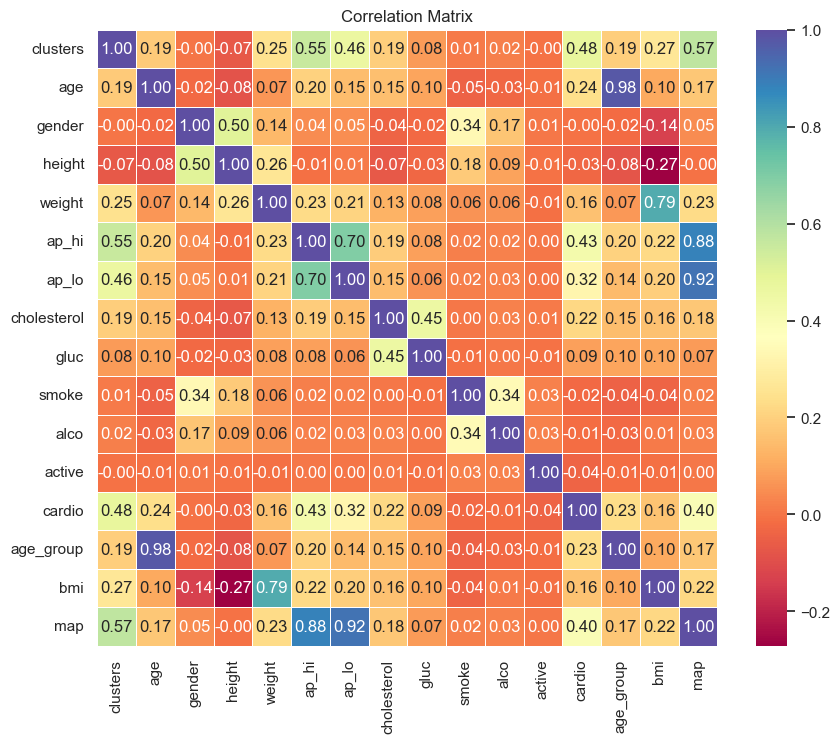

In [47]:
# Set up figure
plt.figure(figsize=(10, 8))

# Draw correlation matrix
sns.heatmap(df.corr(), annot=True, cmap='Spectral', fmt=".2f", linewidths=.5)

# Show the figure
plt.title('Correlation Matrix')
plt.show()

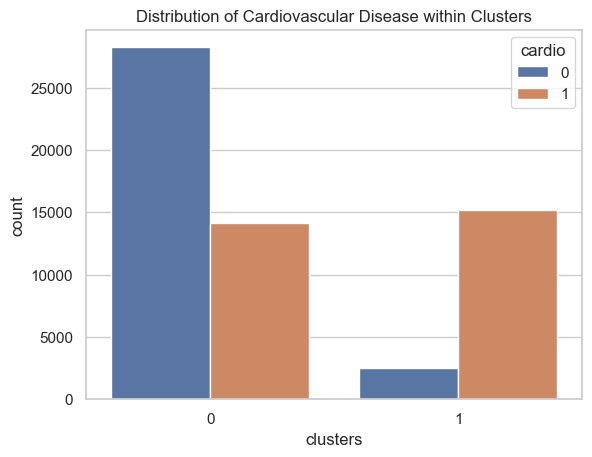

In [48]:
sns.countplot(x='clusters', hue='cardio', data=df)
plt.title('Distribution of Cardiovascular Disease within Clusters')
plt.show()

## Splitting the Data

## Correlation Analysis and Feature Elimination

Upon analyzing the correlation table, it was observed that there is no significant correlation between the 'gender' feature and our target variable. Additionally, the correlation coefficient for the 'alco' feature is only 0.01, suggesting a weak correlation. As a result, these two characteristics were deemed less influential in predicting the target variable.

### Features Removed:

1. **Gender:**
   - No significant correlation found with the target variable.
   
   

2. **Alcohol Consumption ('alco'):**
   - Weak correlation coefficient of 0.01.

### Impact on Model Efficiency:

The removal of these features resulted in an improvement in the efficiency of our predictive models. By eliminating less relevant features, the models can focus on more impactful variables, potentially enhancing their accuracy and performance.


In [49]:
X = df.drop(['cardio','gender','alco'], axis=1)
y = df['cardio']

In [50]:
X

,clusters,age,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,active,age_group,bmi,map
0,0,12,18,32,10,20,0,0,0,1,3,1,2
1,1,17,6,125,40,30,2,0,0,1,4,3,4
2,0,14,15,42,30,10,2,0,0,0,4,1,2
3,1,10,19,112,50,40,0,0,0,1,3,2,5
4,0,10,6,15,0,0,0,0,0,0,3,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69993,0,16,22,69,30,30,0,0,0,1,4,1,3
69994,1,20,15,106,50,20,0,0,0,1,5,2,3
69995,0,15,18,95,20,20,0,0,1,1,4,2,2
69998,1,23,13,79,35,20,0,1,0,0,6,2,3


In [51]:
y

0        0
1        1
2        1
3        1
4        0
        ..
69993    1
69994    1
69995    0
69998    1
69999    0
Name: cardio, Length: 60142, dtype: int64

In [52]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=1)

In [53]:
print("x_train :\n\n",X_train)
print("x_test :\n\n",X_test)
print("y_train :\n\n",y_train)
print("y_test :\n\n",y_test)

x_train :

        clusters  age  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
20655         0   12       5       0     30     10            1     1      0   
19236         1   22      19      48     40     30            0     0      0   
67045         1   26      20     106     30     20            2     0      0   
69703         0   12       5      26     20     10            1     0      0   
39826         0    8      15      79      0     10            0     0      0   
...         ...  ...     ...     ...    ...    ...          ...   ...    ...   
58180         0   16      17     112     20     20            0     0      0   
37785         0   12      23      69     10     10            0     0      0   
6060          1   17      20     136     40     30            0     0      0   
14124         1    8      19     127     40     30            1     0      0   
38356         1    2      14     127     40     30            0     0      0   

       active  age_group  b

## Model Selection

### Random Forest Classifier without cross validation

In [54]:
# build the model
rfModel = RandomForestClassifier(random_state=1)

# Fit the model
rfModel.fit(X_train, y_train)

# Make predictions
rf_pred = rfModel.predict(X_test)



### Performance Measures

In [55]:
# accuracy
rf_accuracy = metrics.accuracy_score(y_test, rf_pred)*100
print(f"Accuracy without CV: {rf_accuracy:.2f}")

Accuracy without CV: 74.54


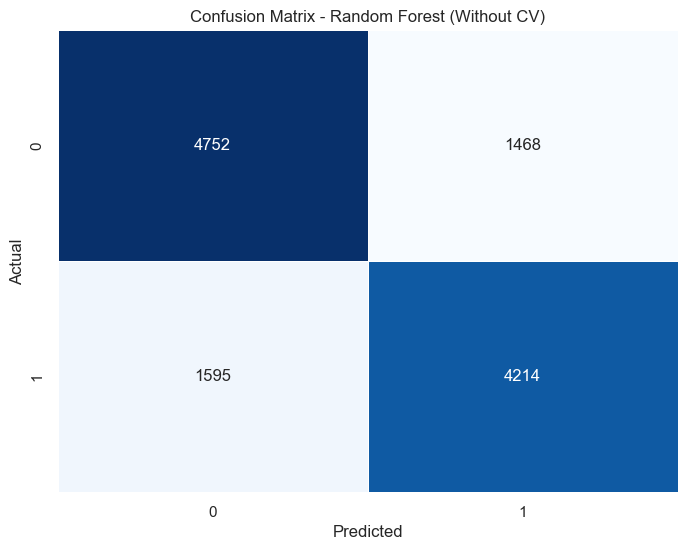

In [56]:
cm_rf = confusion_matrix(y_test, rf_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', linewidths=.5, cbar=False)
plt.title('Confusion Matrix - Random Forest (Without CV)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [57]:
classification_rep_rf = classification_report(y_test, rf_pred)
print('Classification Report - Random Forest (Without CV):')
print(classification_rep_rf)

Classification Report - Random Forest (Without CV):
              precision    recall  f1-score   support

           0       0.75      0.76      0.76      6220
           1       0.74      0.73      0.73      5809

    accuracy                           0.75     12029
   macro avg       0.75      0.74      0.74     12029
weighted avg       0.75      0.75      0.75     12029



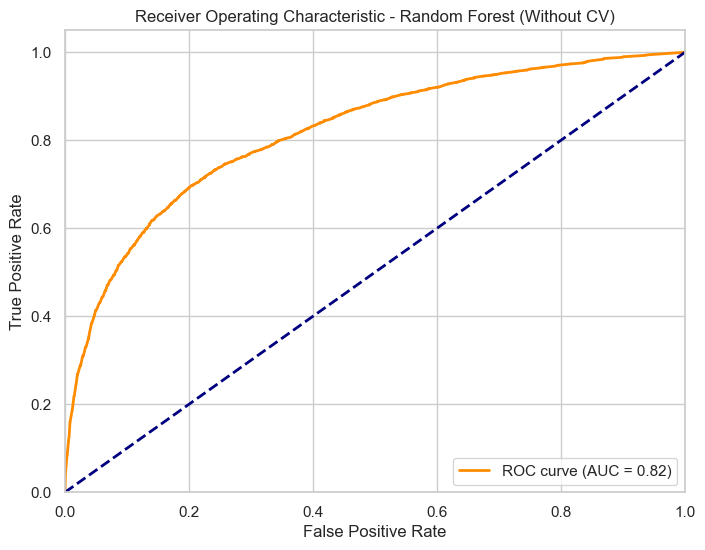

In [58]:
# ROC Curve without Cross Validation
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, rfModel.predict_proba(X_test)[:, 1])
roc_auc_rf = auc(fpr_rf, tpr_rf)

plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Random Forest (Without CV)')
plt.legend(loc='lower right')
plt.show()


### Random Forest Classifier with cross validation

In [59]:
param_grid = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 8],
    'max_features': ['sqrt', 'log2', None],
}

#  Best parameters for RF
rf_best_params = {
    'n_estimators': [100],
    'max_depth': [10],
    'min_samples_split': [10],
    'min_samples_leaf': [1],
    'max_features': [None],
}

# Create grid search
rf_gridsearch = GridSearchCV(estimator=rfModel,param_grid=rf_best_params, cv=5, scoring='accuracy',n_jobs=-1)

# Fit grid search
rf_gridsearch.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1), n_jobs=-1,
             param_grid={'max_depth': [10], 'max_features': [None],
                         'min_samples_leaf': [1], 'min_samples_split': [10],
                         'n_estimators': [100]},
             scoring='accuracy')

In [60]:
best_params = rf_gridsearch.best_params_
best_estimator = rf_gridsearch.best_estimator_

print(f"Best Parameters : {best_params}")
print(f"Best Estimator  : {best_estimator}")

Best Parameters : {'max_depth': 10, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}
Best Estimator  : RandomForestClassifier(max_depth=10, max_features=None, min_samples_split=10,
                       random_state=1)


In [61]:
rf_pred_CV = best_estimator.predict(X_test)

### Performance Measure

In [62]:
rf_accuracy_cv = metrics.accuracy_score(y_test, rf_pred_CV)*100
print(f"Best Accuracy: {rf_accuracy_cv:.2f}")

Best Accuracy: 77.33


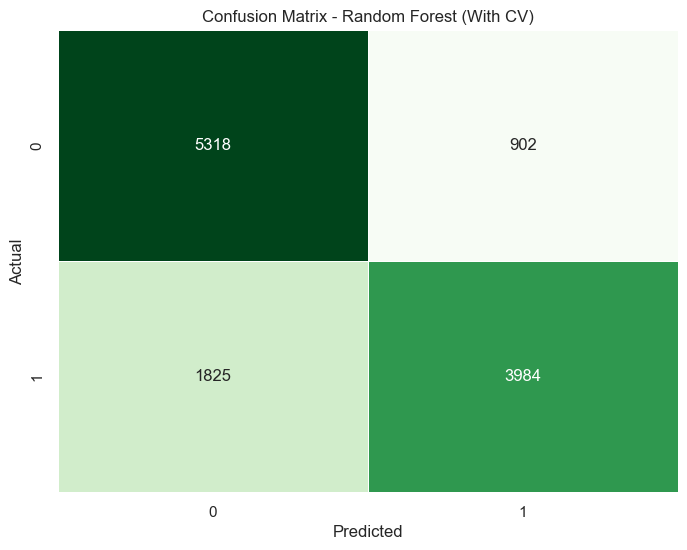

In [63]:
# Confusion Matrix with Cross Validation
cm_rf_cv = confusion_matrix(y_test, rf_pred_CV)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf_cv, annot=True, fmt='d', cmap='Greens', linewidths=.5, cbar=False)
plt.title('Confusion Matrix - Random Forest (With CV)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [64]:
classification_report_str = classification_report(y_test, rf_pred_CV, digits=4)

print("Classification Report for RF with CV:\n", classification_report_str)

Classification Report for RF with CV:
               precision    recall  f1-score   support

           0     0.7445    0.8550    0.7959      6220
           1     0.8154    0.6858    0.7450      5809

    accuracy                         0.7733     12029
   macro avg     0.7799    0.7704    0.7705     12029
weighted avg     0.7787    0.7733    0.7713     12029



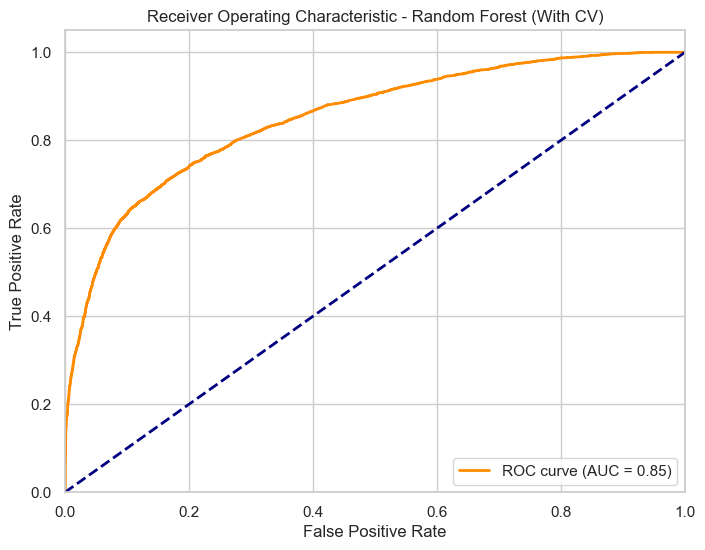

In [65]:
# ROC Curve with Cross Validation
fpr_rf_cv, tpr_rf_cv, thresholds_rf_cv = roc_curve(y_test, best_estimator.predict_proba(X_test)[:, 1])
roc_auc_rf_cv = auc(fpr_rf_cv, tpr_rf_cv)

plt.figure(figsize=(8, 6))
plt.plot(fpr_rf_cv, tpr_rf_cv, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_rf_cv:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Random Forest (With CV)')
plt.legend(loc='lower right')
plt.show()

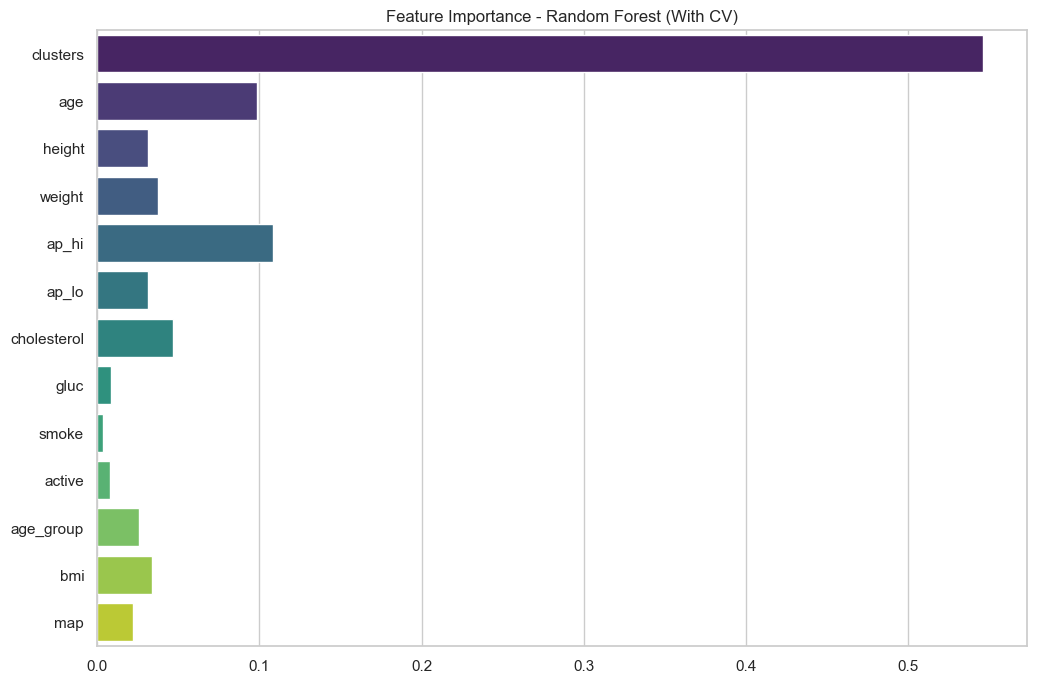

In [66]:
# Feature Importance Plot
feature_importances = best_estimator.feature_importances_
feature_names = X_train.columns

plt.figure(figsize=(12, 8))
sns.barplot(x=feature_importances, y=feature_names, palette='viridis')
plt.title('Feature Importance - Random Forest (With CV)')
plt.show()

### Support Vector Machine (SVM)

### - Linear Kernel without Cross-Validation

In [67]:
# Linear Kernel SVM
linear_svm_model = SVC(kernel='linear', C=1.0, random_state=42)

# Fit the model
linear_svm_model.fit(X_train, y_train)

# Make predictions
linear_svm_pred = linear_svm_model.predict(X_test)



### Performance Measure

In [68]:
# Accuracy without Cross Validation
linear_svm_accuracy = metrics.accuracy_score(y_test, linear_svm_pred)*100
print(f"Linear SVM Accuracy without CV: {linear_svm_accuracy:.2f}")



Linear SVM Accuracy without CV: 72.28


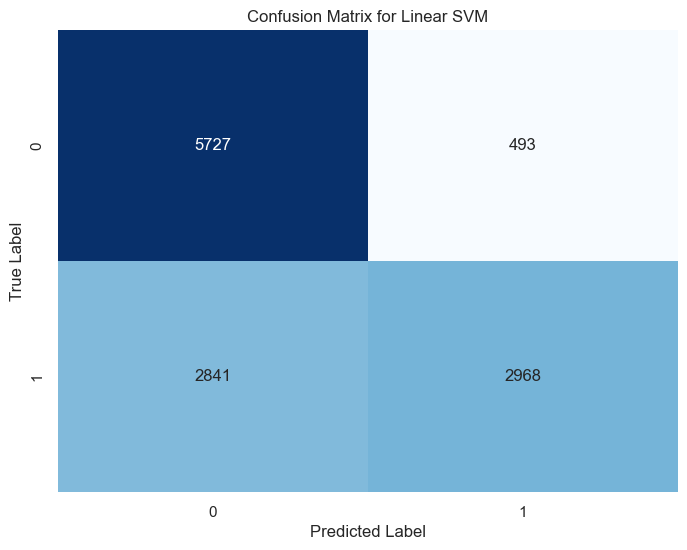

In [69]:
# Confusion Matrix for Linear SVM without cross-validation
conf_matrix_linear_svm = confusion_matrix(y_test, linear_svm_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_linear_svm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Linear SVM')
plt.show()



In [70]:
# Classification Report for Linear SVM without cross-validation
classification_report_linear_svm = classification_report(y_test, linear_svm_pred, digits=4)
print("Classification Report for Linear SVM:\n", classification_report_linear_svm)


Classification Report for Linear SVM:
               precision    recall  f1-score   support

           0     0.6684    0.9207    0.7745      6220
           1     0.8576    0.5109    0.6403      5809

    accuracy                         0.7228     12029
   macro avg     0.7630    0.7158    0.7074     12029
weighted avg     0.7598    0.7228    0.7097     12029



D:\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


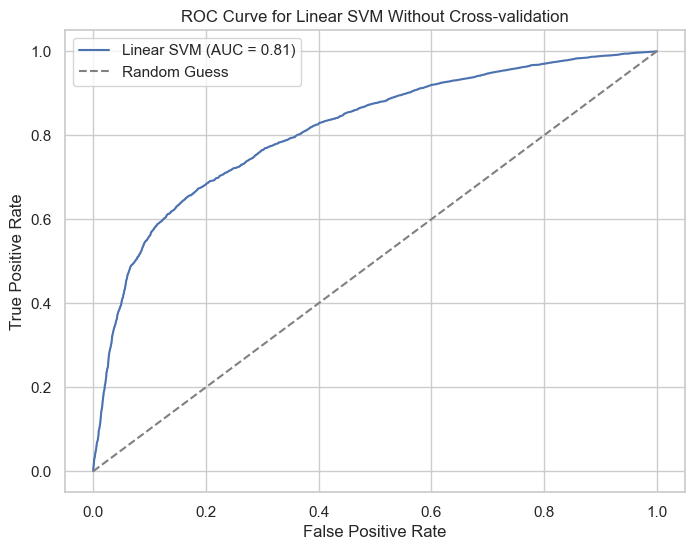

In [71]:
# Get the probability estimates for the positive class
linear_svm_probs = linear_svm_model.decision_function(X_test)

# Compute ROC curve and area under the curve
fpr_linear_svm, tpr_linear_svm, thresholds_linear_svm = roc_curve(y_test, linear_svm_probs)
roc_auc_linear_svm = auc(fpr_linear_svm, tpr_linear_svm)

# Plot ROC curve using Seaborn
plt.figure(figsize=(8, 6))
sns.lineplot(fpr_linear_svm, tpr_linear_svm, label=f'Linear SVM (AUC = {roc_auc_linear_svm:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guess')
plt.title('ROC Curve for Linear SVM Without Cross-validation')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


### - Linear Kernel with Cross-Validation

In [72]:
# Linear Kernel SVM with Cross Validation
linear_svm_model_cv = SVC(kernel='linear', C=1.0, random_state=42)


In [73]:
# Perform cross-validation
cv_results_linear_svm = cross_val_score(linear_svm_model_cv, X_train, y_train, cv=StratifiedKFold(n_splits=5), scoring='accuracy')

print(f"Cross-Validation Accuracy for Linear SVM: {cv_results_linear_svm.mean()*100:.2f}%")



Cross-Validation Accuracy for Linear SVM: 72.22%


In [74]:
# Make predictions using cross-validation
linear_svm_cv_pred = cross_val_predict(linear_svm_model_cv, X_test, y_test, cv=StratifiedKFold(n_splits=5))



In [77]:
# Additional performance measures
precision_linear_svm = precision_score(y_test, linear_svm_cv_pred)
recall_linear_svm = recall_score(y_test, linear_svm_cv_pred)
f1_score_linear_svm = f1_score(y_test, linear_svm_cv_pred)

print(f"Precision for Linear SVM: {precision_linear_svm:.4f}")
print(f"Recall for Linear SVM: {recall_linear_svm:.4f}")
print(f"F1 Score for Linear SVM: {f1_score_linear_svm:.4f}")


Precision for Linear SVM: 0.8576
Recall for Linear SVM: 0.5109
F1 Score for Linear SVM: 0.6403


In [78]:
# Area under the Precision-Recall curve
average_precision_linear_svm = average_precision_score(y_test, linear_svm_cv_pred)
print(f"Area under Precision-Recall curve for Linear SVM: {average_precision_linear_svm:.4f}")

Area under Precision-Recall curve for Linear SVM: 0.6743


### - Polynomial Kernel without Cross Validation

In [79]:
# Polynomial Kernel SVM
poly_svm_model = SVC(kernel='poly', degree=3, C=1.0, gamma='scale', random_state=42)

# Fit the model
poly_svm_model.fit(X_train, y_train)

# Make predictions
poly_svm_pred = poly_svm_model.predict(X_test)



### Performance Measure

In [80]:
# Accuracy without Cross Validation
poly_svm_accuracy = metrics.accuracy_score(y_test, poly_svm_pred)*100
print(f"Polynomial SVM Accuracy without CV: {poly_svm_accuracy:.2f}")



Polynomial SVM Accuracy without CV: 73.34


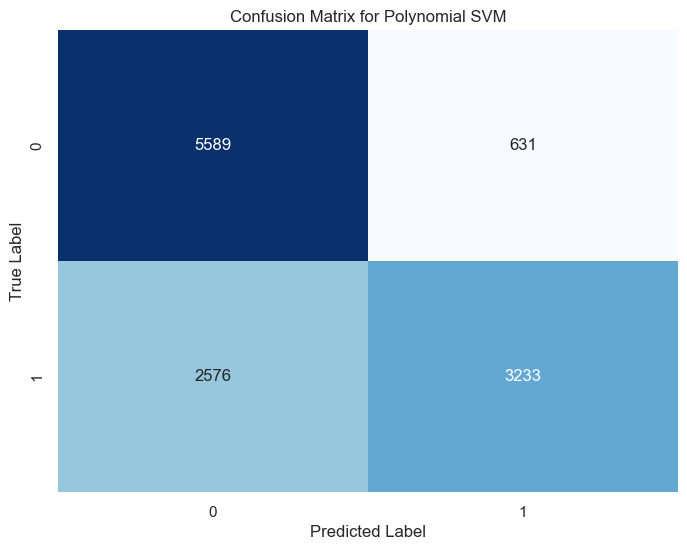

In [81]:
# Confusion Matrix for Polynomial SVM without cross-validation
conf_matrix_poly_svm = confusion_matrix(y_test, poly_svm_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_poly_svm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Polynomial SVM')
plt.show()




In [82]:
# Classification Report for Polynomial SVM without cross-validation
classification_report_poly_svm = classification_report(y_test, poly_svm_pred, digits=4)

print("Classification Report for Polynomial SVM:\n", classification_report_poly_svm)


Classification Report for Polynomial SVM:
               precision    recall  f1-score   support

           0     0.6845    0.8986    0.7771      6220
           1     0.8367    0.5566    0.6685      5809

    accuracy                         0.7334     12029
   macro avg     0.7606    0.7276    0.7228     12029
weighted avg     0.7580    0.7334    0.7246     12029



D:\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


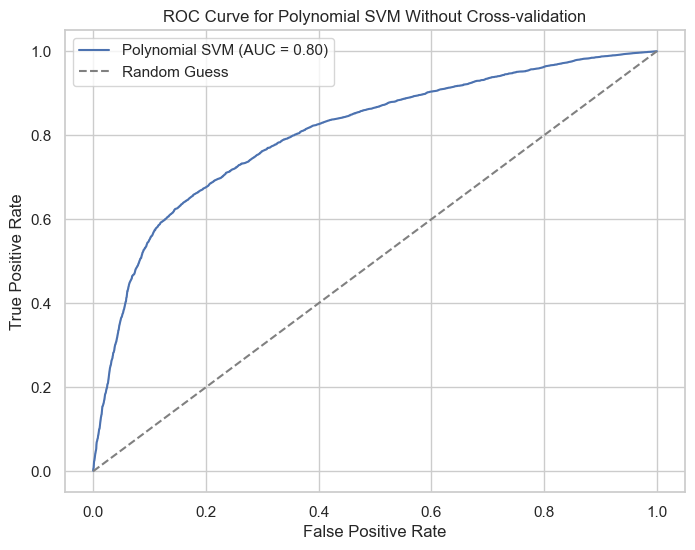

In [83]:

# Get the probability estimates for the positive class
poly_svm_probs = poly_svm_model.decision_function(X_test)

# Compute ROC curve and area under the curve
fpr_poly_svm, tpr_poly_svm, thresholds_poly_svm = roc_curve(y_test, poly_svm_probs)
roc_auc_poly_svm = auc(fpr_poly_svm, tpr_poly_svm)

# Plot ROC curve using Seaborn
plt.figure(figsize=(8, 6))
sns.lineplot(fpr_poly_svm, tpr_poly_svm, label=f'Polynomial SVM (AUC = {roc_auc_poly_svm:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guess')
plt.title('ROC Curve for Polynomial SVM Without Cross-validation')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

### - Polynomial Kernel without Cross Validation

In [84]:
# Polynomial Kernel SVM with Cross Validation
poly_svm_model_cv = SVC(kernel='poly', degree=3, C=1.0, gamma='scale', random_state=42)

In [85]:
# Perform cross-validation
cv_results_poly_svm = cross_val_score(poly_svm_model_cv, X_train, y_train, cv=StratifiedKFold(n_splits=5), scoring='accuracy')

print(f"Cross-Validation Accuracy for Polynomial SVM: {cv_results_poly_svm.mean()*100:.2f}%")


Cross-Validation Accuracy for Polynomial SVM: 72.52%


In [86]:
# Make predictions using cross-validation
poly_svm_cv_pred = cross_val_predict(poly_svm_model_cv, X_test, y_test, cv=StratifiedKFold(n_splits=5))


In [87]:
# Additional performance measures
precision_poly_svm = precision_score(y_test, poly_svm_cv_pred)
recall_poly_svm = recall_score(y_test, poly_svm_cv_pred)
f1_score_poly_svm = f1_score(y_test, poly_svm_cv_pred)

print(f"Precision for Polynomial SVM: {precision_poly_svm:.4f}")
print(f"Recall for Polynomial SVM: {recall_poly_svm:.4f}")
print(f"F1 Score for Polynomial SVM: {f1_score_poly_svm:.4f}")

# Area under the Precision-Recall curve
average_precision_poly_svm = average_precision_score(y_test, poly_svm_cv_pred)
print(f"Area under Precision-Recall curve for Polynomial SVM: {average_precision_poly_svm:.4f}")

Precision for Polynomial SVM: 0.8325
Recall for Polynomial SVM: 0.5321
F1 Score for Polynomial SVM: 0.6492
Area under Precision-Recall curve for Polynomial SVM: 0.6689


### - Radial Basis Function (RBF) Kernel without Cross Validation

In [88]:
# RBF Kernel SVM
rbf_svm_model = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)

# Fit the model
rbf_svm_model.fit(X_train, y_train)

# Make predictions
rbf_svm_pred = rbf_svm_model.predict(X_test)



### Performance Measure

In [89]:
# Accuracy without Cross Validation
rbf_svm_accuracy = metrics.accuracy_score(y_test, rbf_svm_pred)*100
print(f"RBF SVM Accuracy without CV: {rbf_svm_accuracy:.2f}")



RBF SVM Accuracy without CV: 73.36


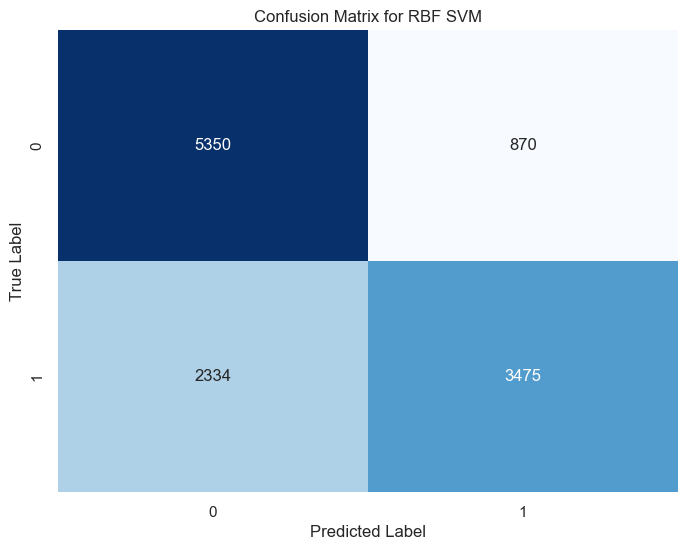

In [90]:
# Confusion Matrix for RBF SVM without cross-validation
conf_matrix_rbf_svm = confusion_matrix(y_test, rbf_svm_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rbf_svm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for RBF SVM')
plt.show()



In [91]:
# Classification Report for RBF SVM without cross-validation
classification_report_rbf_svm = classification_report(y_test, rbf_svm_pred, digits=4)

print("Classification Report for RBF SVM:\n", classification_report_rbf_svm)



Classification Report for RBF SVM:
               precision    recall  f1-score   support

           0     0.6963    0.8601    0.7696      6220
           1     0.7998    0.5982    0.6845      5809

    accuracy                         0.7336     12029
   macro avg     0.7480    0.7292    0.7270     12029
weighted avg     0.7462    0.7336    0.7285     12029



D:\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


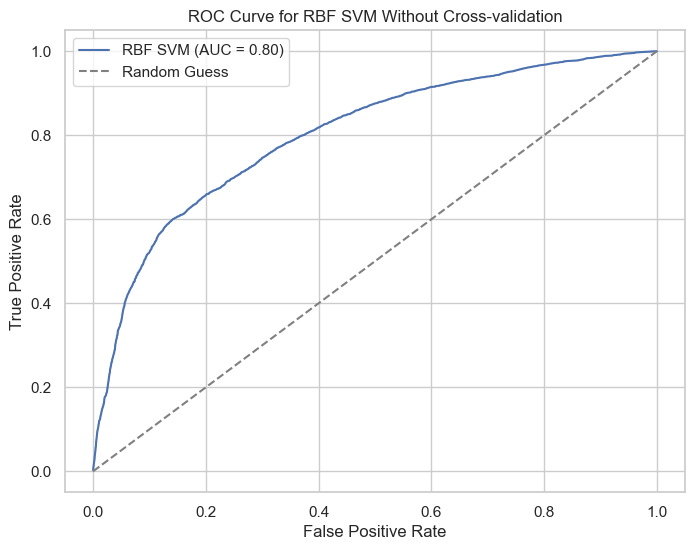

In [92]:
# Get the probability estimates for the positive class
rbf_svm_probs = rbf_svm_model.decision_function(X_test)

# Compute ROC curve and area under the curve
fpr_rbf_svm, tpr_rbf_svm, thresholds_rbf_svm = roc_curve(y_test, rbf_svm_probs)
roc_auc_rbf_svm = auc(fpr_rbf_svm, tpr_rbf_svm)

# Plot ROC curve using Seaborn
plt.figure(figsize=(8, 6))
sns.lineplot(fpr_rbf_svm, tpr_rbf_svm, label=f'RBF SVM (AUC = {roc_auc_rbf_svm:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guess')
plt.title('ROC Curve for RBF SVM Without Cross-validation')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


### - Radial Basis Function (RBF) Kernel with Cross Validation

In [93]:
# RBF Kernel SVM with Cross Validation
rbf_svm_model_cv = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)




In [94]:
# Perform cross-validation
cv_results_rbf_svm = cross_val_score(rbf_svm_model_cv, X_train, y_train, cv=StratifiedKFold(n_splits=5), scoring='accuracy')

print(f"Cross-Validation Accuracy for RBF SVM: {cv_results_rbf_svm.mean()*100:.2f}%")



Cross-Validation Accuracy for RBF SVM: 72.46%


In [95]:
# Make predictions using cross-validation
rbf_svm_cv_pred = cross_val_predict(rbf_svm_model_cv, X_test, y_test, cv=StratifiedKFold(n_splits=5))



In [96]:
# Additional performance measures
precision_rbf_svm = precision_score(y_test, rbf_svm_cv_pred)
recall_rbf_svm = recall_score(y_test, rbf_svm_cv_pred)
f1_score_rbf_svm = f1_score(y_test, rbf_svm_cv_pred)

print(f"Precision for RBF SVM: {precision_rbf_svm:.4f}")
print(f"Recall for RBF SVM: {recall_rbf_svm:.4f}")
print(f"F1 Score for RBF SVM: {f1_score_rbf_svm:.4f}")



Precision for RBF SVM: 0.7759
Recall for RBF SVM: 0.5805
F1 Score for RBF SVM: 0.6641


In [97]:
# Area under the Precision-Recall curve
average_precision_rbf_svm = average_precision_score(y_test, rbf_svm_cv_pred)
print(f"Area under Precision-Recall curve for RBF SVM: {average_precision_rbf_svm:.4f}")

Area under Precision-Recall curve for RBF SVM: 0.6530


### Naive Bayes Classifier without Cross- Validation

In [98]:
# Create Naive Bayes model
nb_model = GaussianNB()

# Fit the model
nb_model.fit(X_train, y_train)

# Make predictions
nb_pred = nb_model.predict(X_test)

### Performance Measure

In [99]:
nb_accuracy = metrics.accuracy_score(y_test, nb_pred)*100
print(f"Naive Bayes Accuracy without CV: {nb_accuracy:.2f}")

Naive Bayes Accuracy without CV: 74.16


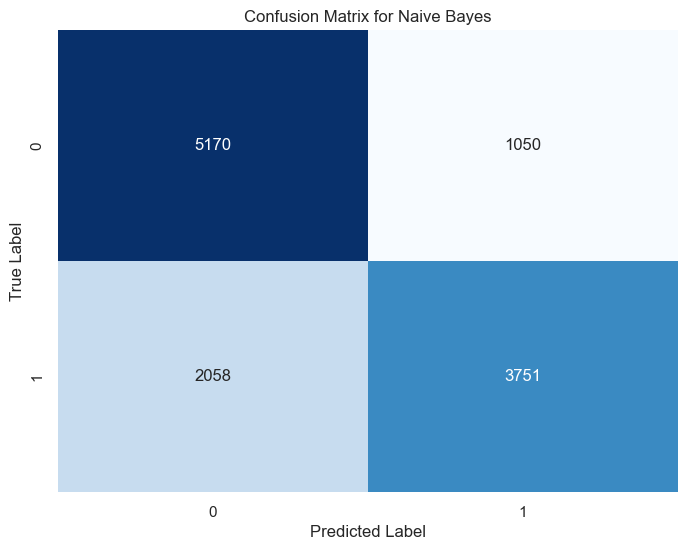

In [100]:
conf_matrix_nb = confusion_matrix(y_test, nb_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_nb, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Naive Bayes')
plt.show()

In [101]:
# Classification Report for Naive Bayes without cross-validation
classification_report_nb = classification_report(y_test, nb_pred, digits=4)

print("Classification Report for Naive Bayes:\n", classification_report_nb)

Classification Report for Naive Bayes:
               precision    recall  f1-score   support

           0     0.7153    0.8312    0.7689      6220
           1     0.7813    0.6457    0.7071      5809

    accuracy                         0.7416     12029
   macro avg     0.7483    0.7385    0.7380     12029
weighted avg     0.7472    0.7416    0.7390     12029



D:\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


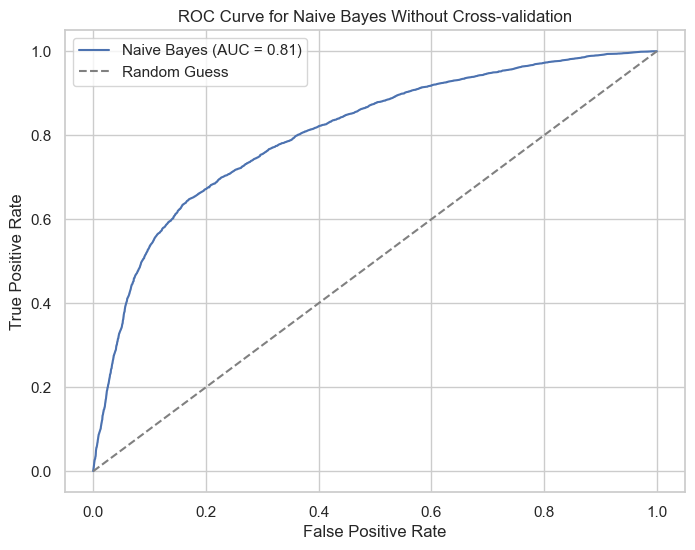

In [102]:
# Get the probability estimates for the positive class
nb_probs = nb_model.predict_proba(X_test)[:, 1]

# Compute ROC curve and area under the curve
fpr_nb, tpr_nb, thresholds_nb = roc_curve(y_test, nb_probs)
roc_auc_nb = auc(fpr_nb, tpr_nb)

# Plot ROC curve using Seaborn
plt.figure(figsize=(8, 6))
sns.lineplot(fpr_nb, tpr_nb, label=f'Naive Bayes (AUC = {roc_auc_nb:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guess')
plt.title('ROC Curve for Naive Bayes Without Cross-validation')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

### Naive Bayes Classifier with Cross- Validation

In [103]:
# Naive Bayes with Cross Validation
nb_model_cv = GaussianNB()



In [104]:
# Perform cross-validation
cv_results_nb = cross_val_score(nb_model_cv, X_train, y_train, cv=StratifiedKFold(n_splits=5), scoring='accuracy')

print(f"Cross-Validation Accuracy for Naive Bayes: {cv_results_nb.mean()*100:.2f}%")



Cross-Validation Accuracy for Naive Bayes: 73.97%


In [105]:
# Make predictions using cross-validation
nb_cv_pred = cross_val_predict(nb_model_cv, X_test, y_test, cv=StratifiedKFold(n_splits=5))



In [106]:
# Additional performance measures
precision_nb = precision_score(y_test, nb_cv_pred)
recall_nb = recall_score(y_test, nb_cv_pred)
f1_score_nb = f1_score(y_test, nb_cv_pred)

print(f"Precision for Naive Bayes: {precision_nb:.4f}")
print(f"Recall for Naive Bayes: {recall_nb:.4f}")
print(f"F1 Score for Naive Bayes: {f1_score_nb:.4f}")



Precision for Naive Bayes: 0.7819
Recall for Naive Bayes: 0.6454
F1 Score for Naive Bayes: 0.7071


In [107]:
# Area under the Precision-Recall curve
average_precision_nb = average_precision_score(y_test, nb_cv_pred)
print(f"Area under Precision-Recall curve for Naive Bayes: {average_precision_nb:.4f}")


Area under Precision-Recall curve for Naive Bayes: 0.6758


### Logistic Regression without Cross-Validation

In [108]:
# Create Logistic Regression model
lr_model = LogisticRegression(random_state=42)

# Fit the model
lr_model.fit(X_train, y_train)

# Make predictions
lr_pred = lr_model.predict(X_test)

D:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Performance Measure

In [109]:
# Accuracy without Cross Validation
lr_accuracy = metrics.accuracy_score(y_test, lr_pred)*100
print(f"Logistic Regression Accuracy without CV: {lr_accuracy:.2f}")

Logistic Regression Accuracy without CV: 74.94


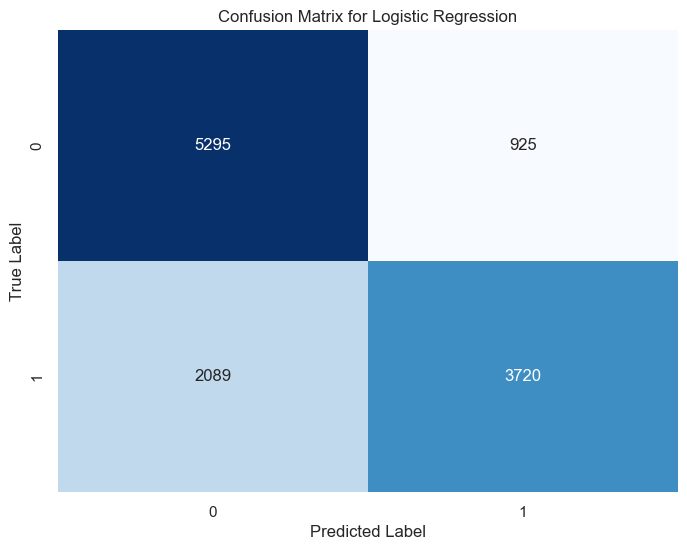

In [110]:
# Confusion Matrix for Logistic Regression without cross-validation
conf_matrix_lr = confusion_matrix(y_test, lr_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_lr, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()


In [111]:
# Classification Report for Logistic Regression without cross-validation
classification_report_lr = classification_report(y_test, lr_pred, digits=4)

print("Classification Report for Logistic Regression:\n", classification_report_lr)

Classification Report for Logistic Regression:
               precision    recall  f1-score   support

           0     0.7171    0.8513    0.7784      6220
           1     0.8009    0.6404    0.7117      5809

    accuracy                         0.7494     12029
   macro avg     0.7590    0.7458    0.7451     12029
weighted avg     0.7575    0.7494    0.7462     12029



D:\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


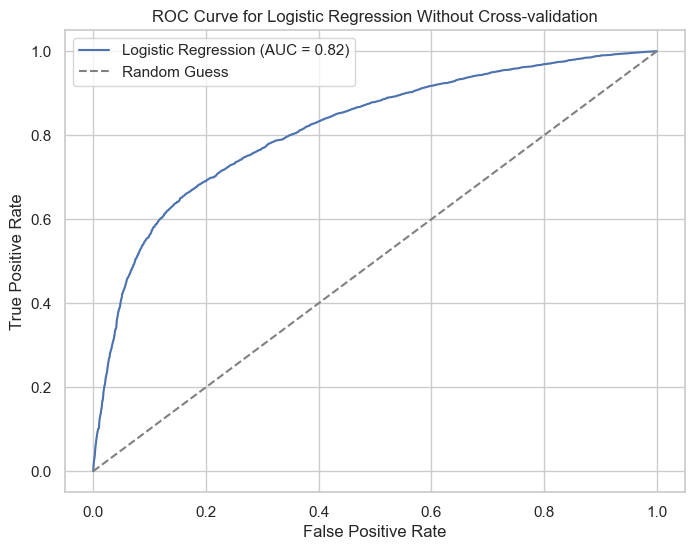

In [112]:
# Get the probability estimates for the positive class
lr_probs = lr_model.predict_proba(X_test)[:, 1]

# Compute ROC curve and area under the curve
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, lr_probs)
roc_auc_lr = auc(fpr_lr, tpr_lr)

# Plot ROC curve using Seaborn
plt.figure(figsize=(8, 6))
sns.lineplot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {roc_auc_lr:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guess')
plt.title('ROC Curve for Logistic Regression Without Cross-validation')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

### Logistic Regression With Cross Validation

In [113]:
# Logistic Regression with Cross Validation
lr_model_cv = LogisticRegression(random_state=42)


In [114]:
# Perform cross-validation
cv_results_lr = cross_val_score(lr_model_cv, X_train, y_train, cv=StratifiedKFold(n_splits=5), scoring='accuracy')

print(f"Cross-Validation Accuracy for Logistic Regression: {cv_results_lr.mean()*100:.2f}%")



D:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_resu

Cross-Validation Accuracy for Logistic Regression: 74.53%


D:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [115]:
# Make predictions using cross-validation
lr_cv_pred = cross_val_predict(lr_model_cv, X_test, y_test, cv=StratifiedKFold(n_splits=5))



D:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_resu

In [116]:
# Additional performance measures
precision_lr = precision_score(y_test, lr_cv_pred)
recall_lr = recall_score(y_test, lr_cv_pred)
f1_score_lr = f1_score(y_test, lr_cv_pred)

print(f"Precision for Logistic Regression: {precision_lr:.4f}")
print(f"Recall for Logistic Regression: {recall_lr:.4f}")
print(f"F1 Score for Logistic Regression: {f1_score_lr:.4f}")

# Area under the Precision-Recall curve
average_precision_lr = average_precision_score(y_test, lr_cv_pred)
print(f"Area under Precision-Recall curve for Logistic Regression: {average_precision_lr:.4f}")

Precision for Logistic Regression: 0.8021
Recall for Logistic Regression: 0.6342
F1 Score for Logistic Regression: 0.7083
Area under Precision-Recall curve for Logistic Regression: 0.6853


### XGBoost Classifier without Cross Validation

In [117]:
# Create XGBoost model
xgb_model = XGBClassifier(random_state=42)

# Fit the model
xgb_model.fit(X_train, y_train)

# Make predictions
xgb_pred = xgb_model.predict(X_test)

### Performance Measure

In [118]:
# Accuracy without Cross Validation
xgb_accuracy = metrics.accuracy_score(y_test, xgb_pred)*100
print(f"XGBoost Accuracy without CV: {xgb_accuracy:.2f}")

XGBoost Accuracy without CV: 77.68


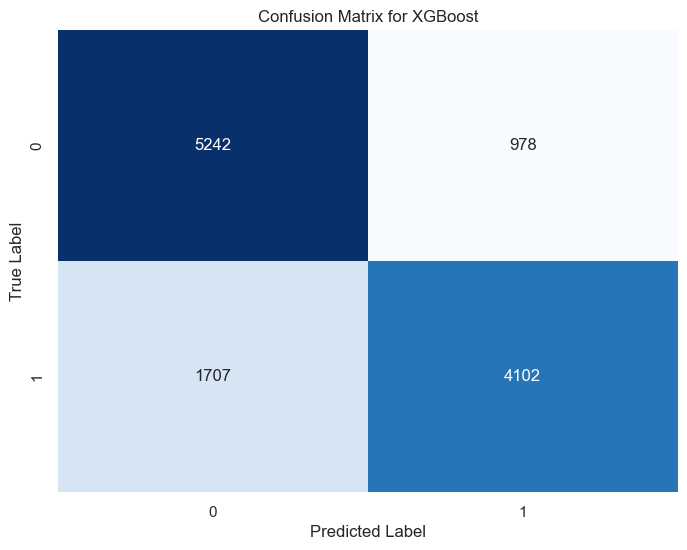

In [119]:
# Confusion Matrix for XGBoost without cross-validation
conf_matrix_xgb = confusion_matrix(y_test, xgb_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_xgb, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for XGBoost')
plt.show()

In [120]:
# Classification Report for XGBoost without cross-validation
classification_report_xgb = classification_report(y_test, xgb_pred, digits=4)

print("Classification Report for XGBoost:\n", classification_report_xgb)

Classification Report for XGBoost:
               precision    recall  f1-score   support

           0     0.7544    0.8428    0.7961      6220
           1     0.8075    0.7061    0.7534      5809

    accuracy                         0.7768     12029
   macro avg     0.7809    0.7745    0.7748     12029
weighted avg     0.7800    0.7768    0.7755     12029



D:\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


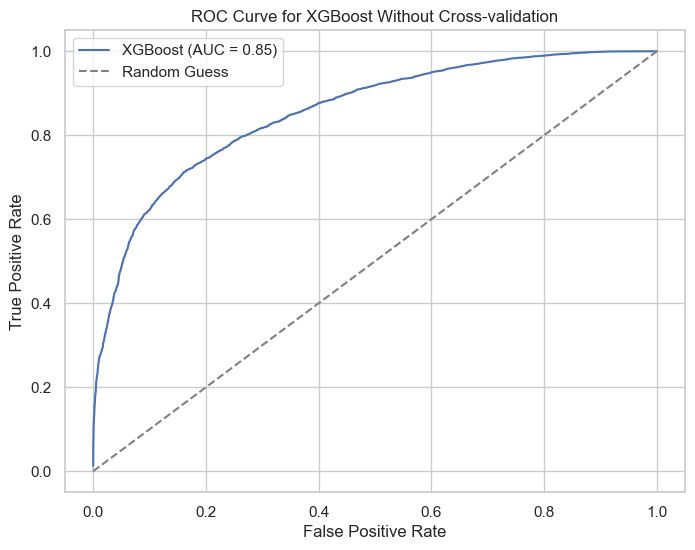

In [121]:
# Get the probability estimates for the positive class
xgb_probs = xgb_model.predict_proba(X_test)[:, 1]

# Compute ROC curve and area under the curve
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_test, xgb_probs)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

# Plot ROC curve using Seaborn
plt.figure(figsize=(8, 6))
sns.lineplot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC = {roc_auc_xgb:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guess')
plt.title('ROC Curve for XGBoost Without Cross-validation')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

### XGBoost With Cross-Validation

In [122]:
# XGBoost with Cross Validation
xgb_model_cv = XGBClassifier(random_state=42)


In [123]:
# Perform cross-validation
cv_results_xgb = cross_val_score(xgb_model_cv, X_train, y_train, cv=StratifiedKFold(n_splits=5), scoring='accuracy')

print(f"Cross-Validation Accuracy for XGBoost: {cv_results_xgb.mean()*100:.2f}%")



Cross-Validation Accuracy for XGBoost: 77.21%


In [124]:
# Make predictions using cross-validation
xgb_cv_pred = cross_val_predict(xgb_model_cv, X_test, y_test, cv=StratifiedKFold(n_splits=5))


In [125]:
# Additional performance measures
precision_xgb = precision_score(y_test, xgb_cv_pred)
recall_xgb = recall_score(y_test, xgb_cv_pred)
f1_score_xgb = f1_score(y_test, xgb_cv_pred)

print(f"Precision for XGBoost: {precision_xgb:.4f}")
print(f"Recall for XGBoost: {recall_xgb:.4f}")
print(f"F1 Score for XGBoost: {f1_score_xgb:.4f}")



Precision for XGBoost: 0.7719
Recall for XGBoost: 0.6893
F1 Score for XGBoost: 0.7283


In [126]:
# Area under the Precision-Recall curve
average_precision_xgb = average_precision_score(y_test, xgb_cv_pred)
print(f"Area under Precision-Recall curve for XGBoost: {average_precision_xgb:.4f}")

Area under Precision-Recall curve for XGBoost: 0.6821
